In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from rich.progress import track
from datetime import datetime, date, time

In [2]:
import sys
 
# setting path
sys.path.append('../..')

import train_by_none as trbn

# from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

# from scale_by_train15 import load_tf_model

---------------------------------------
printTest
---------------------------------------
---------------------------------------
cyan
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
green
---------------------------------------
---------------------------------------
yellow
---------------------------------------
---------------------------------------
blue
---------------------------------------
---------------------------------------
magenta
---------------------------------------
---------------------------------------
white
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
                RESTART                
---------------------------------------
---------------------------------------
                SET LOG                
-------------------------

In [4]:
jmfile = 'test_024.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = trbn.rt_limit_upper
jf['RT_LIMIT_LOWER'] = trbn.rt_limit_lower

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684571922686,61,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-1,text,True,NaN,323,138,40,49,http://193.225.250.30/cpu/fibonacci_no_gc/16,61,0,4,500,200
1,1684571922696,67,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-5,text,True,NaN,323,138,50,94,http://193.225.250.30/cpu/fibonacci_no_gc/16,67,0,5,500,200
2,1684571922693,73,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-3,text,True,NaN,323,138,50,100,http://193.225.250.30/cpu/fibonacci_no_gc/16,73,0,8,500,200


In [5]:
# Beérkezés sorrendje helyett a kiküldés sorrendjében rendezve

jf = jf.sort_values(by='timeStamp', ignore_index=True)

jf = jf.reset_index(drop=True)

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684571922686,61,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-1,text,True,NaN,323,138,40,49,http://193.225.250.30/cpu/fibonacci_no_gc/16,61,0,4,500,200
1,1684571922688,93,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-2,text,True,NaN,323,138,50,100,http://193.225.250.30/cpu/fibonacci_no_gc/16,93,0,6,500,200
2,1684571922693,73,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-3,text,True,NaN,323,138,50,100,http://193.225.250.30/cpu/fibonacci_no_gc/16,73,0,8,500,200


In [6]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

print(FIBO.shape)
print(PRIME.shape)

(15481, 19)
(14974, 19)


In [7]:
import datetime

# Get current date and time
now = datetime.datetime.now()
print(now)
print("Second:", now.second)

2023-05-26 20:38:57.275857
Second: 57


In [8]:
jf = jf.astype({'timeStamp':'int'})
FIBO  = FIBO.astype({'timeStamp':'int'})
PRIME = PRIME.astype({'timeStamp':'int'})

import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
FIBO['date'] = FIBO['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
PRIME['date'] = PRIME['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

FIBO.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,date
0,1684571922686,61,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-1,text,True,NaN,323,138,40,49,http://193.225.250.30/cpu/fibonacci_no_gc/16,61,0,4,500,200,2023-05-20 08:38:42.686
1,1684571922688,93,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-2,text,True,NaN,323,138,50,100,http://193.225.250.30/cpu/fibonacci_no_gc/16,93,0,6,500,200,2023-05-20 08:38:42.688


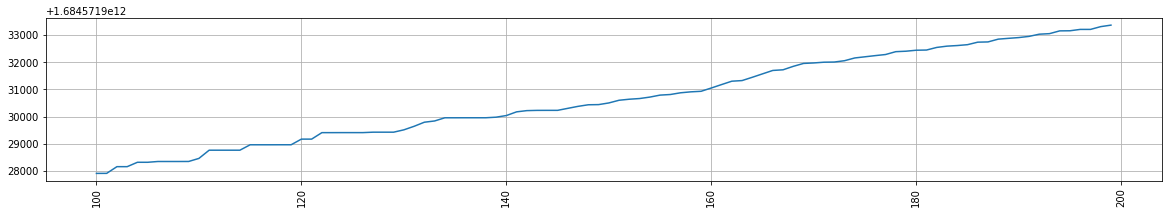

In [9]:
F = 100

plt.figure(figsize=(20, 3))
plt.plot(jf.iloc[F:F+100]['timeStamp'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

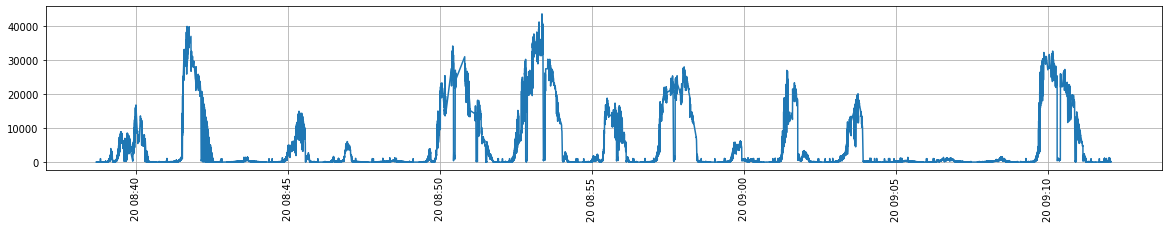

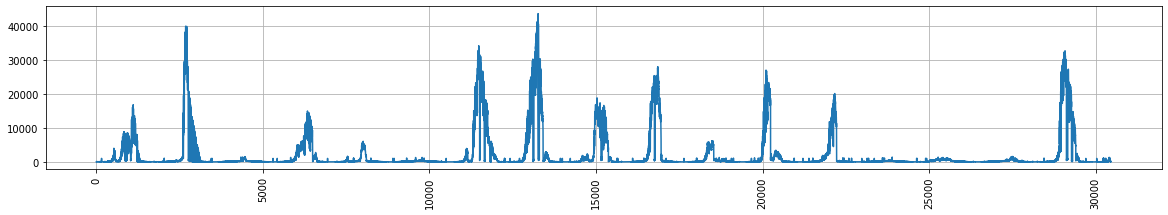

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

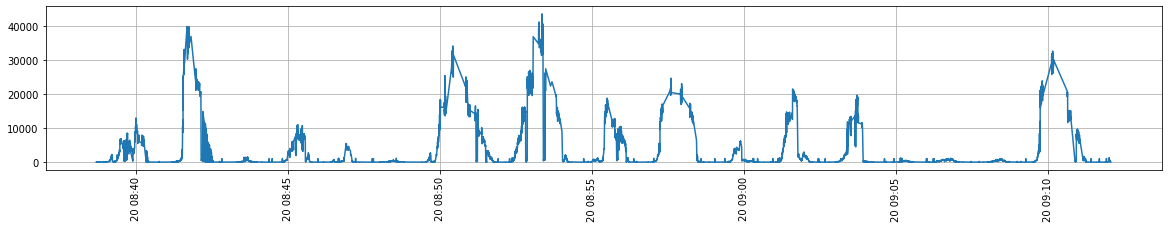

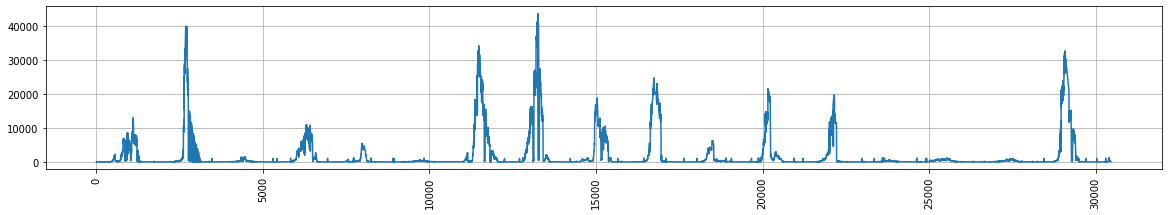

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

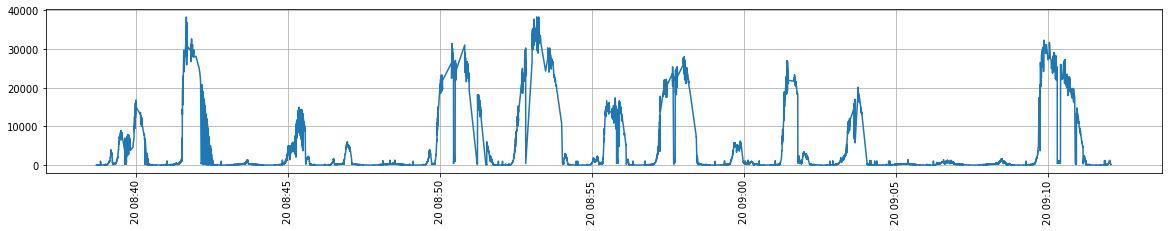

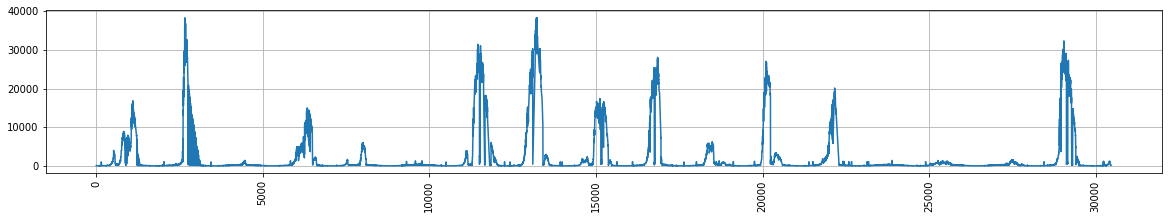

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(PRIME['date'], PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

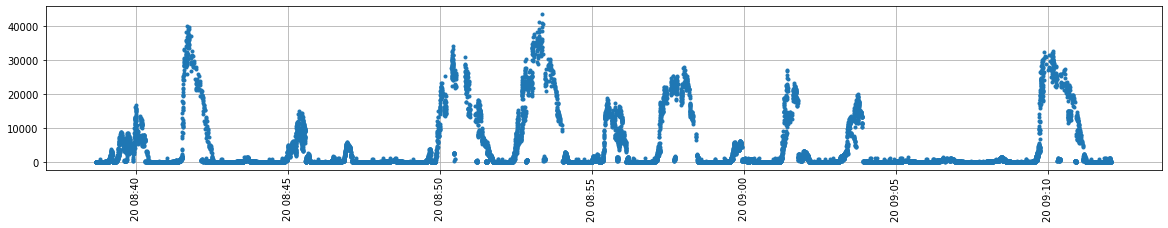

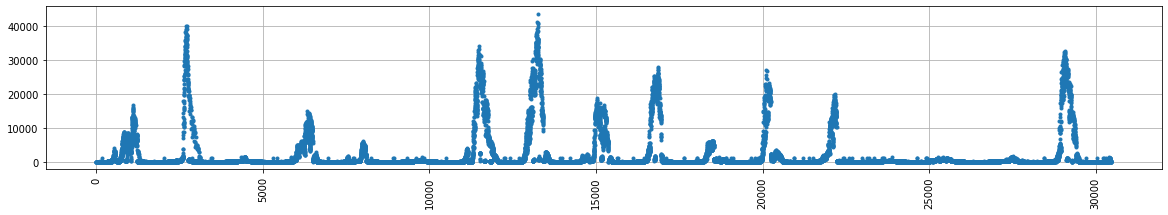

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [14]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

In [15]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


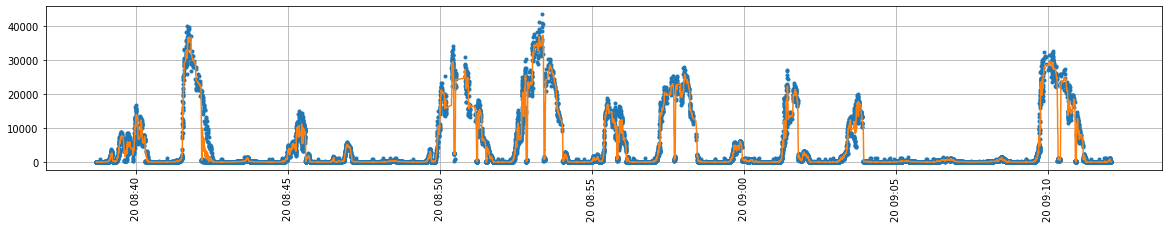

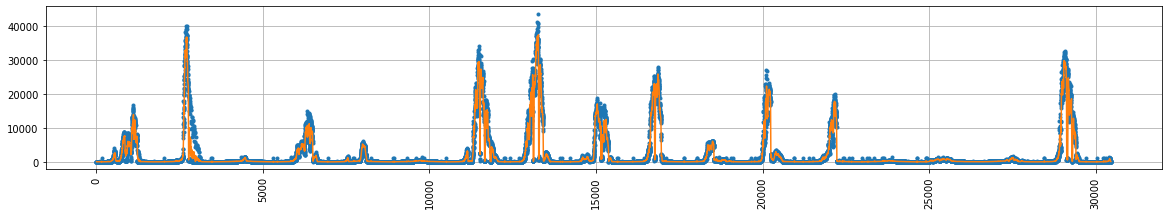

In [16]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [17]:
jf.groupby([jf['date'].dt.hour]).Latency.mean()

date
8    2317.752113
9    1400.477277
Name: Latency, dtype: float64

In [18]:
jf.groupby([jf['date'].dt.minute]).Latency.mean()

date
0       174.002591
1      5679.928264
2       265.966245
3      4858.998480
4        79.692308
5       157.996644
6       387.351045
7        73.692244
8       299.638408
9      2901.882804
10    14868.738854
11      446.145873
12      471.960000
38       53.009036
39     2654.419185
40     1408.232892
41     5184.721180
42     1240.665227
43      214.770282
44      154.886519
45     3372.519190
46      556.210623
47      249.447721
48      171.515533
49      744.298507
50    21158.651079
51     2760.925770
52     4423.811736
53    23514.895397
54      282.218230
55     5402.361367
56      462.765297
57     9350.991011
58     2656.619112
59     1137.843878
Name: Latency, dtype: float64

In [19]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
8     38         53.009036
      39       2654.419185
      40       1408.232892
      41       5184.721180
      42       1240.665227
      43        214.770282
      44        154.886519
      45       3372.519190
      46        556.210623
      47        249.447721
      48        171.515533
      49        744.298507
      50      21158.651079
      51       2760.925770
      52       4423.811736
      53      23514.895397
      54        282.218230
      55       5402.361367
      56        462.765297
      57       9350.991011
      58       2656.619112
      59       1137.843878
9     0         174.002591
      1        5679.928264
      2         265.966245
      3        4858.998480
      4          79.692308
      5         157.996644
      6         387.351045
      7          73.692244
      8         299.638408
      9        2901.882804
      10      14868.738854
      11        446.145873
      12        471.960000
Name: Latency, dtype: float64

In [20]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

42

In [21]:
jf['hour']   = jf['date'].map(lambda x : x.hour)
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [22]:
md = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [23]:
md

date  date  date
8     38    42       73.000000
            43       42.350000
            44       57.454545
            45       37.736842
            46       46.285714
                       ...    
9     11    59      476.666667
      12    0       769.769231
            1       594.062500
            2       199.950000
            3        87.000000
Name: Latency, Length: 1901, dtype: float64

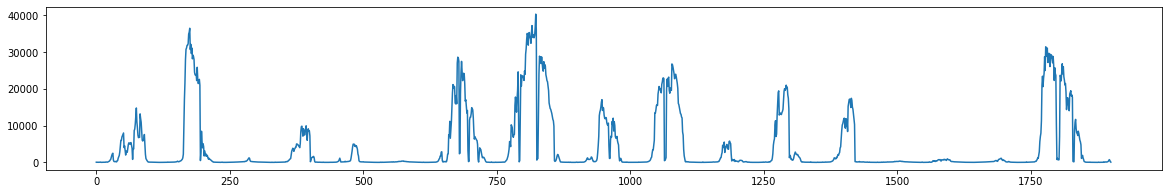

In [24]:
# Másodperc alapő válaszidő átlagok

plt.figure(figsize=(20, 3))
plt.plot(md.values)
plt.show()

In [25]:
_hours   = md.index.levels[0]
_minutes = md.index.levels[1]
_seconds = md.index.levels[2]

_hours_lowest =_hours.min()
_hours_highest = _hours.max()

_minutes_lowest = _minutes.min()
_minutes_highest = _minutes.max()

_seconds_lowest = _seconds.min()
_seconds_highest = _seconds.max()

print(' sec min %.1d sec max %.1d' % (_seconds_lowest, _seconds_highest))
print(' min min %.1d min max %.1d' % (_minutes_lowest, _minutes_highest))
print(' hrs min %.1d hrs max %.1d' % (_hours_lowest, _hours_highest))

 sec min 0 sec max 59
 min min 0 min max 59
 hrs min 8 hrs max 9


In [26]:
tp = []

start_date = str(jf['date'].loc[0])[:11]

for _ in md.index:
    h = _[0]
    # h = str(_[0]).zfill(2)
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    s = str('%02d' % (_[2],))
    # print(h, m, s)
    tp.append(start_date + str(h) + ':' + str(m) + ':' + str(s))

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-05-20 08:38:42,73.000000
1,2023-05-20 08:38:43,42.350000
2,2023-05-20 08:38:44,57.454545
3,2023-05-20 08:38:45,37.736842
4,2023-05-20 08:38:46,46.285714


In [27]:
mz = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['sec']]).Latency.mean()

mz

date  date  sec
8     38    4        54.207143
            5        52.135417
      39    0       268.494382
            1       910.233533
            2      2381.791045
                      ...     
9     11    2        50.770000
            3        22.944724
            4        46.630000
            5       181.924324
      12    0       471.960000
Name: Latency, Length: 201, dtype: float64

In [28]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:11]

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    h = _[0]
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    
    if c == 0:
        c += 1
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(_first_sec))
        print(tz)
    else:
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(s*10))
        
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

['2023-05-20 08:38:42']


,date,md
0,2023-05-20 08:38:42,54.207143
1,2023-05-20 08:38:50,52.135417
2,2023-05-20 08:39:00,268.494382
3,2023-05-20 08:39:10,910.233533
4,2023-05-20 08:39:20,2381.791045


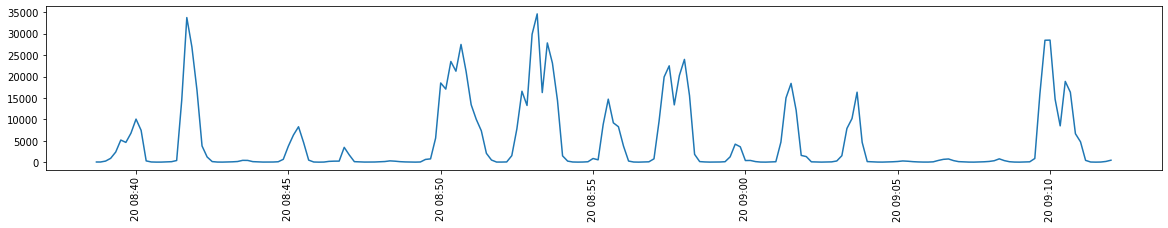

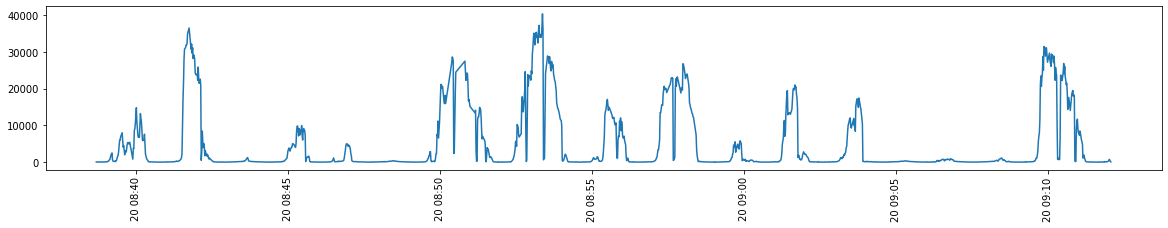

In [29]:
plt.figure(figsize=(20, 3))
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.figure(figsize=(20, 3))
plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [30]:
print(tp['date'][0])
print(tz['date'][0])

2023-05-20 08:38:42
2023-05-20 08:38:42


In [31]:
# Ha tologatnom kéne őket

from datetime import datetime, timedelta

# tz['date'] = tz['date'] + timedelta(seconds=1)
# tp['date'] = tp['date'] + timedelta(seconds=1)

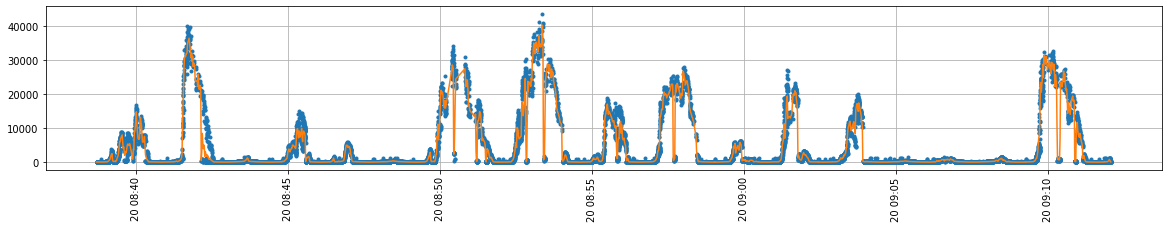

In [32]:
# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

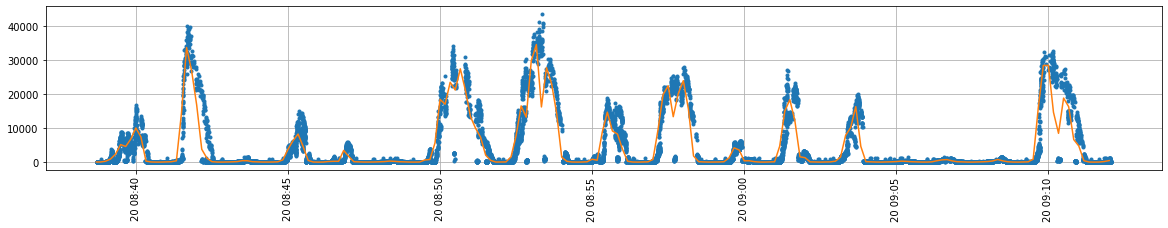

In [33]:
# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

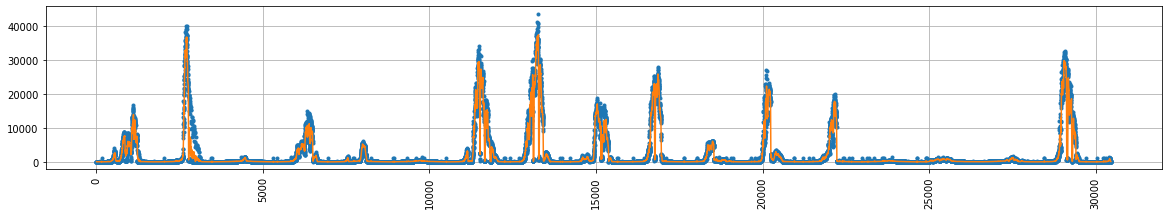

In [34]:
# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)

# Az erre helyezet 10-es mozgóátlag nem az elmúlt 10 mp hanem az utolsó 10 kérés válaszidejének átlaga
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

---

Most van az, hogy jól jönne a **Scaler.log** mert a **Metric.log** csak 10 másodpercenként mintavételez, de lehet, hogy már a mintavételezés felénél meg volt a skálázás és ezt jó lenne látni, főként azért hogy korrelál a nagy felbontású válaszidő alakulásával ami meg a JMeterből jön.

A **Scaler.log**-ban csak a skálázáskor kiadott parancs időbélyege van eltárolva.

# Scaler.log - Metric.log - JMeter.log

In [35]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,08:38:50,08:38:5,85.84220,43.868707,1,14.0,14.3,83.7,16.2,...,106376.0,974790.8,2048.0,344622.0,100.0,85.3,85.3,83.2,85.3,83.2
1,192.168.0.6,08:39:01,08:39:0,72.52915,38.047271,1,19.2,58.1,38.5,61.5,...,106881.6,979443.2,2048.0,344466.8,100.0,121.0,121.0,118.9,121.0,118.9
2,192.168.0.6,08:39:14,08:39:1,949.13475,245.921386,1,17.6,95.0,0.9,99.1,...,108503.6,984053.2,2048.0,344484.8,100.0,88.8,88.8,84.0,88.8,84.0
3,192.168.0.6,08:39:20,08:39:2,3045.72340,900.687138,3,16.7,92.5,3.8,96.2,...,108508.4,986690.4,2048.0,344477.2,100.0,58.3,58.3,57.1,58.3,57.2
4,192.168.0.6,08:39:37,08:39:3,5893.85770,2012.877234,2,12.4,97.4,0.6,99.4,...,107472.0,981161.6,2048.0,344474.8,100.0,26.2,26.2,25.2,26.2,25.2


In [36]:
jf[['date']].head(3)

,date
0,2023-05-20 08:38:42.686
1,2023-05-20 08:38:42.688
2,2023-05-20 08:38:42.693


In [37]:
df[['time']].head(3)

,time
0,08:38:5
1,08:39:0
2,08:39:1


In [40]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


In [41]:
scale_file_name = 'scaled_train_by_none.log'

sf = pd.read_csv(scale_file_name, sep=',', header=0)

display(sf.head(2))

,time,notification,actual_vm_number_was,actual_vm_number_is
0,08:39:14,Worker 192.168.0.73 added.,1,2
1,08:39:14,Worker 192.168.0.91 added.,2,3


In [43]:
print('Scaler.log')
print(sf['time'].iloc[0])
print(sf['time'].iloc[-1])
print(len(sf))

print('JMeter.log')
print(jf['date'].iloc[0])
print(jf['date'].iloc[-1])
print(len(jf))

Scaler.log
08:39:14
09:12:01
306
JMeter.log
2023-05-20 08:38:42.686000
2023-05-20 09:12:03.191000
30455


Az sf (slacer.log) alapján meg lehetne mondani, hogy mikor mi volt a gépek száma.


A jf.date (datetime64) végig lehet iterálni a jf összes során és összenézni az sf time (??) sorával

In [44]:
jf['date']

0       2023-05-20 08:38:42.686
1       2023-05-20 08:38:42.688
2       2023-05-20 08:38:42.693
3       2023-05-20 08:38:42.695
4       2023-05-20 08:38:42.696
                  ...          
30450   2023-05-20 09:12:02.808
30451   2023-05-20 09:12:02.865
30452   2023-05-20 09:12:02.938
30453   2023-05-20 09:12:02.941
30454   2023-05-20 09:12:03.191
Name: date, Length: 30455, dtype: datetime64[ns]

In [45]:
sf['time']

# Ez sajnos nekem még kevés ugyhogy picit átalkítom

0      08:39:14
1      08:39:14
2      08:39:20
3      08:39:37
4      08:39:37
         ...   
301    09:11:40
302    09:11:40
303    09:11:50
304    09:11:50
305    09:12:01
Name: time, Length: 306, dtype: object

In [46]:
start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '
print(start_date)

sf['date'] = start_date + sf['time']
sf['date'] = sf['date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

sf.head(3)

# kiegészítettem az év:hónap:nap-pal

2023-05-20 


,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,08:39:14,Worker 192.168.0.73 added.,1,2,2023-05-20 08:39:14
1,08:39:14,Worker 192.168.0.91 added.,2,3,2023-05-20 08:39:14
2,08:39:20,Worker 192.168.0.73 removed.,3,2,2023-05-20 08:39:20


In [47]:
sf['date']

0     2023-05-20 08:39:14
1     2023-05-20 08:39:14
2     2023-05-20 08:39:20
3     2023-05-20 08:39:37
4     2023-05-20 08:39:37
              ...        
301   2023-05-20 09:11:40
302   2023-05-20 09:11:40
303   2023-05-20 09:11:50
304   2023-05-20 09:11:50
305   2023-05-20 09:12:01
Name: date, Length: 306, dtype: datetime64[ns]

In [48]:
jf['date']

0       2023-05-20 08:38:42.686
1       2023-05-20 08:38:42.688
2       2023-05-20 08:38:42.693
3       2023-05-20 08:38:42.695
4       2023-05-20 08:38:42.696
                  ...          
30450   2023-05-20 09:12:02.808
30451   2023-05-20 09:12:02.865
30452   2023-05-20 09:12:02.938
30453   2023-05-20 09:12:02.941
30454   2023-05-20 09:12:03.191
Name: date, Length: 30455, dtype: datetime64[ns]

In [49]:
jf['date'].iloc[3]

Timestamp('2023-05-20 08:38:42.695000')

In [50]:
jf['dates'] = jf['date'].apply(lambda d: d.replace(microsecond=0))

In [51]:
jf['dates'].iloc[3]

Timestamp('2023-05-20 08:38:42')

In [52]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

# Sajnos ez a megoldás ezen az adatbázison nem lesz jó

# -----------------------------------------------------


# Bár most azok után, hogy rendeztem az adatokat a time
# szerint már lehet, hogy jó lesz


_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

jf['sf_vm'] = 0

c = 0

for i in track(range(jf['Latency'].shape[0])):
    jf['sf_vm'].iloc[i] = _current_vm_number

    jf_date = jf['dates'].iloc[i]
    
    if c < len(sf):
        if jf_date == _current_scale_date:
            # print('    Scale', jf_date, _current_scale_date, _current_vm_number)
            _current_vm_number = sf['actual_vm_number_is'].iloc[c]
            if c + 1 < len(sf):
                _current_scale_date = sf['date'].iloc[c + 1]
                # print('--> Scale', jf_date, _current_scale_date, _current_vm_number)


            c += 1
            # print(c)
            # print(i)


Output()

1
2


/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

In [63]:
sf.iloc[150:170].head(100)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
150,08:54:20,Worker 192.168.0.91 removed.,3,2,2023-05-20 08:54:20
151,08:54:30,Worker 192.168.0.73 added.,2,3,2023-05-20 08:54:30
152,08:54:30,Worker 192.168.0.73 added.,2,3,2023-05-20 08:54:30
153,08:54:40,Worker 192.168.0.93 removed.,2,1,2023-05-20 08:54:40
154,08:55:01,Worker 192.168.0.73 added.,1,2,2023-05-20 08:55:01
155,08:55:01,Worker 192.168.0.73 added.,1,2,2023-05-20 08:55:01
156,08:55:12,Worker 192.168.0.91 added.,2,3,2023-05-20 08:55:12
157,08:55:12,Worker 192.168.0.93 added.,3,4,2023-05-20 08:55:12
158,08:55:21,Worker 192.168.0.73 removed.,4,3,2023-05-20 08:55:21
159,08:55:21,Worker 192.168.0.91 removed.,3,2,2023-05-20 08:55:21


<h2> <font color="red">Vannak durva anomáliák</font> </h2>

Például ez hogy lehetséges?

    154 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01
    155 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01

Bele néztem a train_by_none.py kódba is és nem tudom az okát

---

Amúgy érdkes, hogy milyen időpontokban ad hozzá, vesz el vm-ket.

Megnéztem a programot amit írtam és akkor kerül bele a **Scale.log** filébe a bejegyzés és az időbélyeg,
amikor kiadta a skálázási parancsot.

Ez az esetek többségében 10-ik másodperc valahányszorosa.

Nem elfelejteni, hogy a tanulóadatok előállításánál nincs semmilyen számátás ami miatt késne a rendszer.

Ezért az a gyanúm, hogy a tényleges skálázásnál ez már nem így lesz.

Ennek ellenére látok néhány adatot amikor példul

    92 	09:33:50 	Worker 192.168.0.73 removed.
    93 	09:34:02 	Worker 192.168.0.73 added.

Nem teljesen értem, hogy a faszba fordulhatott elő, hogy két máodperc múlva is meg lett hívva ez az eljárás.

Ezért ennek most egy picit utána nézek.

## Sajnos meg is fejtettem az okát.

Ugye amikor túl van terhelve a rendszer akkor később érkezik be egy válaszidő ezért és mivel az egész rendszer akkor triggerelődik amikor bejön egy válaszidő ezért van ez a csúszkálás.

Ez megoldódna ha minden 10-ik másodpercben lefutna a rendszer de jelenleg nem így működik, és most még nem is foglalkozom vele, hogy átírjam a rendszert.

In [54]:
sf_second = sf['date'].dt.second

np.unique(sf_second, return_counts=True)

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 14, 16, 17, 18, 20,
        21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 34, 37, 40, 41, 42, 43, 44,
        45, 48, 49, 50, 51, 52, 53, 54, 55, 57]),
 array([25,  8,  2,  1,  3,  3,  1,  1,  2, 28,  6,  8,  6,  2,  1,  3, 24,
         5,  1,  5,  3,  2,  2,  3, 31,  8,  8,  1,  2, 25,  3,  6,  3,  3,
         2,  3,  4, 39,  7,  2,  6,  2,  5,  1]))

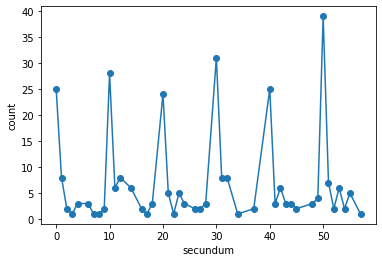

In [55]:
_ = np.unique(sf_second, return_counts=True)

plt.scatter(_[0], _[1])
plt.plot(_[0], _[1])
plt.xlabel('secundum')
plt.ylabel('count')
plt.show()

# többségében 10 valahányszorosára jön ki a skálázás, de sok olyan eset is van amikor nem.

In [56]:
# Van e bárhol ilyen dátum?

(jf['dates'] == '2023-05-21 09:22:03').any(axis=0)

False

In [57]:
jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,1684571922686,61,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-1,text,True,NaN,323,...,200,2023-05-20 08:38:42.686,0,NaN,8,38,42,4,2023-05-20 08:38:42,1
1,1684571922688,93,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-2,text,True,NaN,323,...,200,2023-05-20 08:38:42.688,1,NaN,8,38,42,4,2023-05-20 08:38:42,1
2,1684571922693,73,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-3,text,True,NaN,323,...,200,2023-05-20 08:38:42.693,2,NaN,8,38,42,4,2023-05-20 08:38:42,1


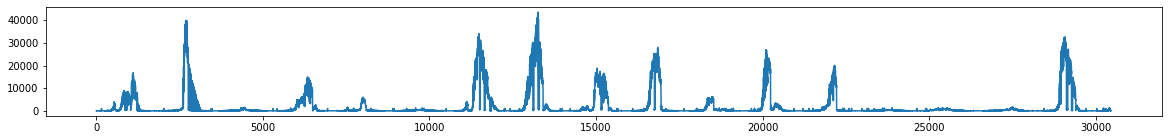

In [58]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['Latency'])
plt.show()

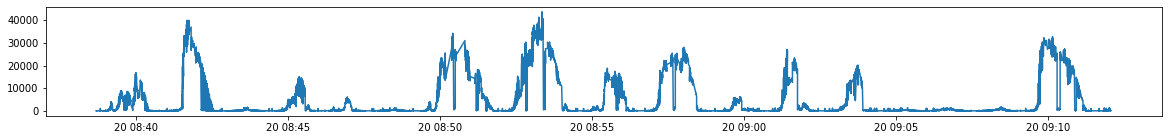

In [59]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['Latency'])
plt.show()

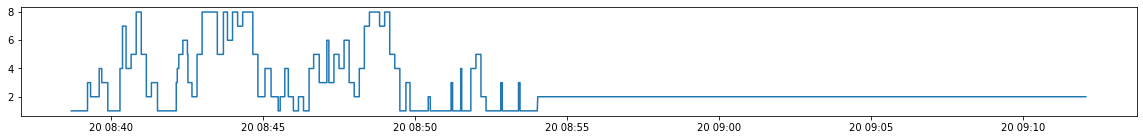

In [60]:
# Dátum alapján rendezet jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['sf_vm'])
plt.show()

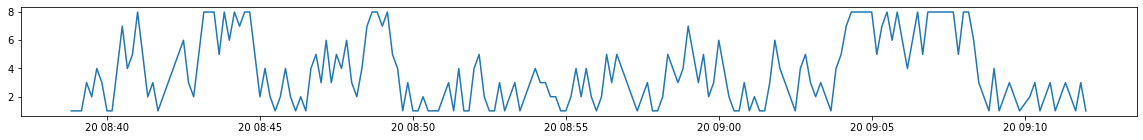

In [61]:
# Metric.log-ból kiolvasott VM Number

plt.figure(figsize=(20,2))
plt.plot(df['nntime'], df['worker_number'])
plt.show()

In [90]:

# Most van egy olyan jf dataframem amiben benne van a JMeter adat és a Scaler.log-ból származó skálázások is

# Érdemes lenne egy plotton ábrázolni a korábban már megcsinált 1 másodpercre, 10 másodpercre aggregált
# átalgos válaszidőket és a virtuális gépke számát is


## Ezt feljebb már megcsináltam

De most itt hagyom mert csak plottolás

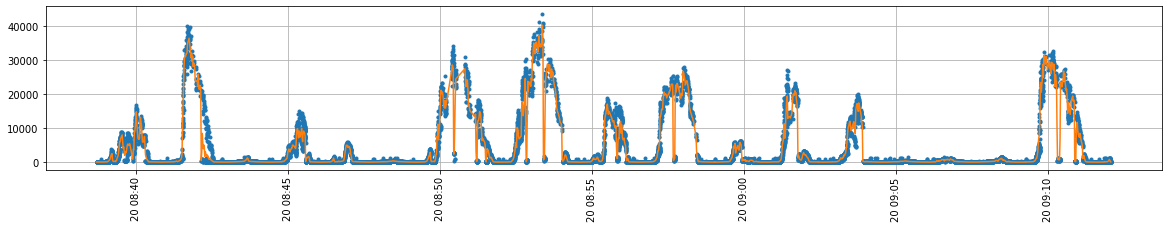

In [64]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Ezen dolgoztam

Hogy a JMeter.log és a Metric.log vagyis Scale.log wm_number egy df-be és egy ábrára kerüljenek.

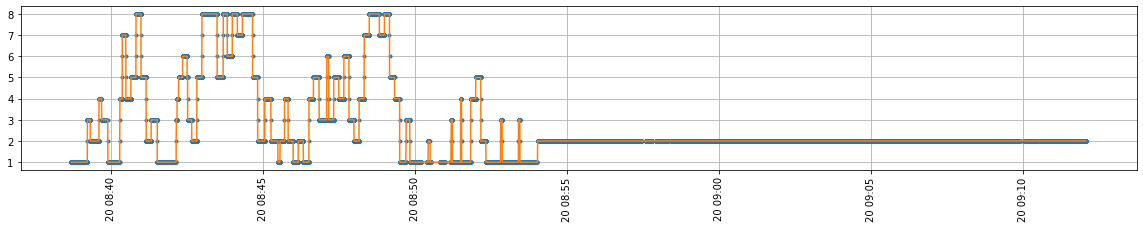

In [65]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [66]:
# Ellenőrzés (felületes)

sf.tail(5)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
301,09:11:40,Worker 192.168.0.73 added.,1,2,2023-05-20 09:11:40
302,09:11:40,Worker 192.168.0.91 added.,2,3,2023-05-20 09:11:40
303,09:11:50,Worker 192.168.0.73 removed.,3,2,2023-05-20 09:11:50
304,09:11:50,Worker 192.168.0.91 removed.,2,1,2023-05-20 09:11:50
305,09:12:01,Worker 192.168.0.73 added.,1,2,2023-05-20 09:12:01


## Ezen dolgoztam

A két logfiléből kinyert adat együtt - JMeter.log és Scale.log vm_number

**tp\['date'\]** és **tp\['md'\]** a JMeter.log-ból számolt másodpercekre lebontott átlagú **Latency** a JMetric.log-ból.

**jf\['date'\]** és **jf\['sf_vm'\]** a Scaler.log alapján a JMeter df-be létrehozott **Worker Number**

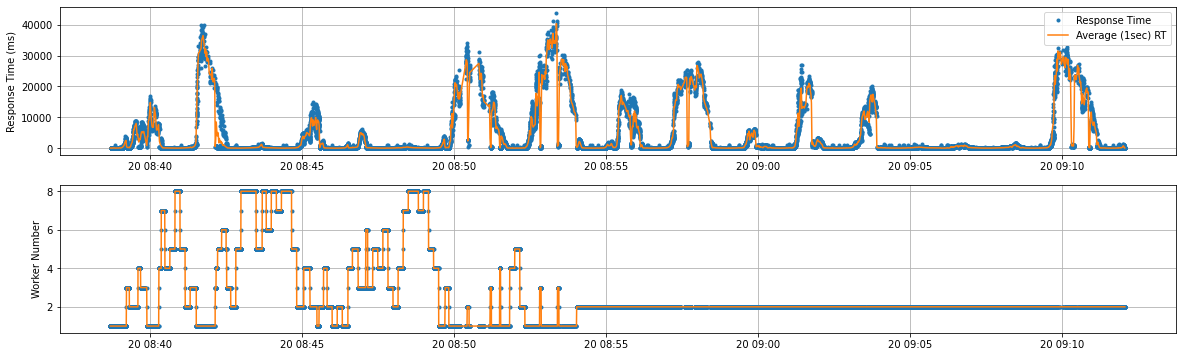

In [67]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

    nem az ábra alapján vonnám le ezt a tanulságot de a skálázás hatása elég gyorsan jelentkezik

## A jf alapján meg lehet nézni mindkét API-t

A jf alapján meg lehet nézni mindkét API-t?

In [68]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

## JMeter.log alapján

A két REST API 10 másodpercenként mért átlagos válaszideje - a **JMeter.csv** alapján.

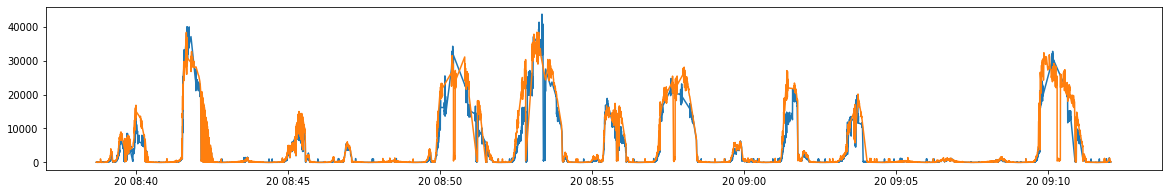

In [69]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.plot(PRIME['date'], PRIME['Latency'])
plt.show()

## JMeter.log és Scaler.log alapján

Mellé teszem a **Scaler.log** alapján kinyert **worker_number** válotzót is.

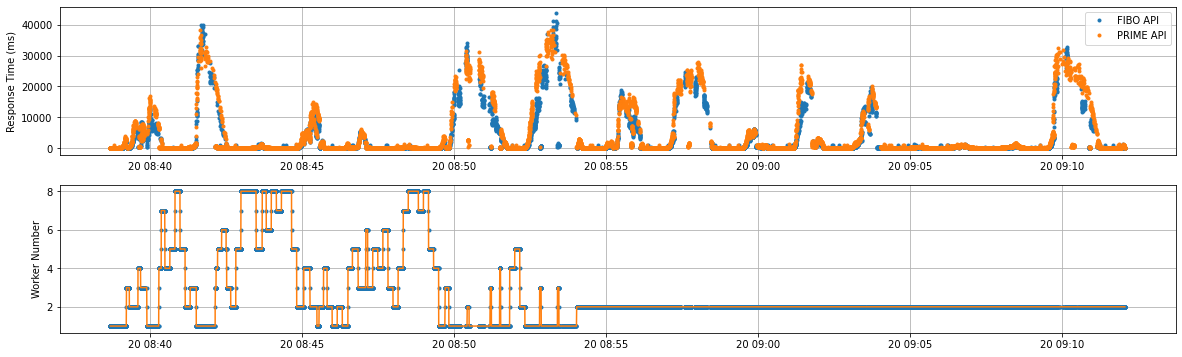

In [70]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(FIBO['date'], FIBO['Latency'], marker='.', linewidth=0, label='FIBO API')
ax0.plot(PRIME['date'], PRIME['Latency'], marker='.', linewidth=0, label='PRIME API')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

## Miért csináltam ezt az egészet?

### Különös tekintettel erre az adott Test26 mérésre.

Ebben a terhelésben két REST API végpontot hívtam. A metric_log filében 10 másodpercentként visszamért átlagos válaszidőből nem tudom megállapítani, hogy melyik REST API végponthoz melyik válaszidő tartozik és ez nem is lehetséges, hiszen ezek még átlagolva is voltak.

Amire csak kíváncsi voltam, hogy hat-e az egyik REST API válaszidejére a másik REST API. Mivel ebben a kisérletben aszinkronban voltak a REST API-k, a beérkező kérések száma mindkettőre azonos és konstans volt. Csak a kapott paraméteren keresztül tudtam hatást gyakorolni arra, hogy mennyire legyen számításigényes az adott feladat. Ezek a paraméterek kerültek aszinkron módon beküldésre úgy, hogy amikor az egyik REST API számításigényes paramétert kapott akkor a másik nem és fordítva.

**Ha ezek után** a két válaszidő külön külön is egy időben emelkedett meg és a válaszidejeik megemelkedései szinkronban vannak, akkor ez azt jelenti, hogy a másik REST API hatása.

Igaz ezt a kísérletet jobb lett volna úgy elvégezni, hogy közben nem mozgatom a Workerek számát, mert önmagában ez is hatással lehet egyik vagy másik vagy mindkét REST API válaszidejére.

---

Ezek után nézzük meg, hogy alault a két REST API válaszideje és a Workerek száma.

## Fontos

Ami itt kövektezik, az nem lehet annyira pontos mint a JMeter.log és a Scaler.log alapján összerakott megoldás.

**Miért?**

Mert a Metric.log filokban a MyLog.log fileből és az Access.log-ból kinyert és 10 másodpercre aggregált átlagok vannak.

**Megjegyzés:**

A **Metric.log** fájlba az idő **HH:MM:S** formátumba kerül. Ezért még hozzá kell adnom az **Y-m-d** adatot és egy **0**-t a **s** mögé.

Azt viszont, hogy mi volt az **Év-Hónap-Nap** a **Metric.log** filéből nem lehet megtudni, de ha rendesen tároltam el a teszt mérési eredményket akkor a könyvtárban ott van a **JMeter.csv** file is amiben viszont benne van a dátum.

Ha egy mérés nem csúszik át egyik napból a másikba akkor egyszerűen ki lehet olvani a **JMeter.csv** file első sorából a dátumot és azt beilleszteni a **Metric.log** adataiba.

Egyszerűbb lett volna, ha a **Metric.log** készítésénél beillesztem a dátumot is amikor a mérés zajlik de most már így alakult és nem fogok 26 mérést újra csinálni.

In [71]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


## Csak a Metric.log alapján

Ennél a megoldásnál jobb az amelyiket a **JMeter.csv** és a **Scaler.log** alapján raktam össze, mert sokkal nagyobb a felbontása (kérés alapú, vagy másodperc alapú)

De mivel a metrikákat és a tényleges döntéseket is ez alapján hozza meg az optimizer ezért látni akarom ezt is.

Itt viszont REST API-ra szétbontva nézem meg a válaszidő és a virtuális gépek számának alakulását a tisztán a **Metric.log** alapján.

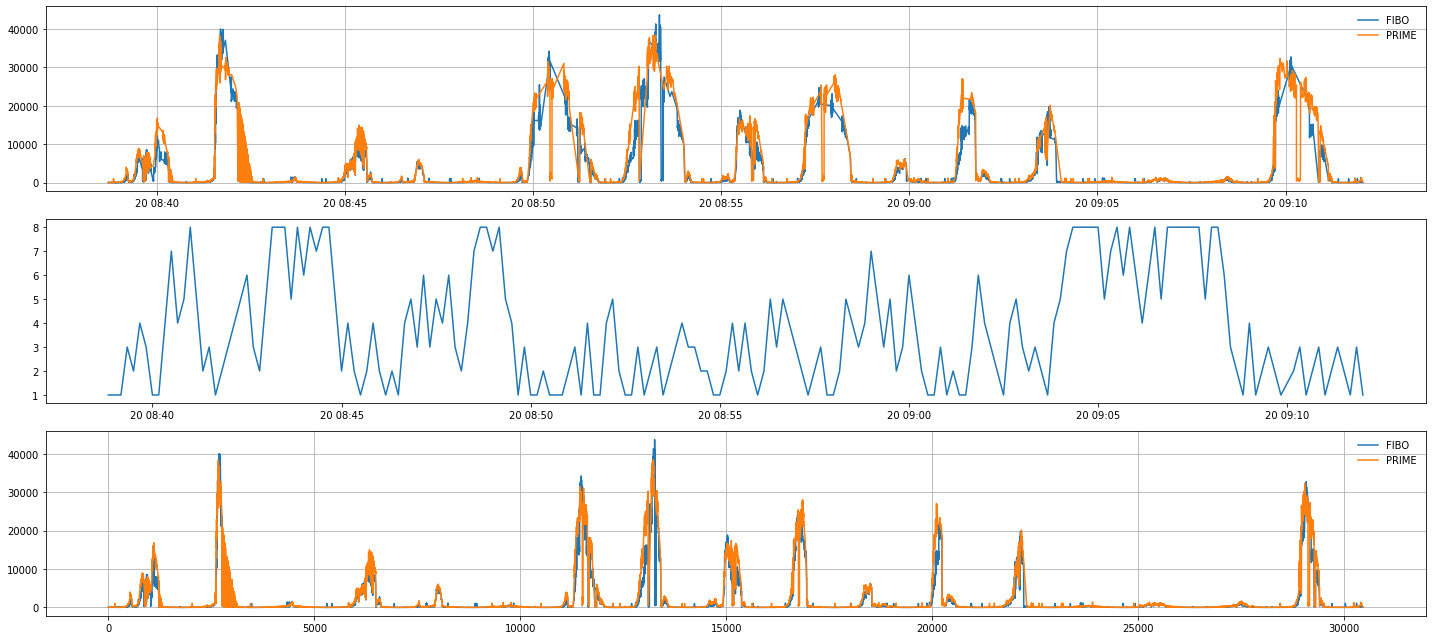

In [72]:
# Teljesen jó,

# ---

# Kiegészítés

# Azért ez még mindíg nem tökéletes

# Az igazi az lenne ha a scaler.log-ból olvasnám ki, hogy mikor volt skálázás és azt tenném rá.


def plot(dot):
    
    if dot == False:
        linewidth = 1.5
        marker = None
    if dot == True:
        linewidth = 0.0
        marker = '.'
        
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(FIBO['date'], FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax0.plot(PRIME['date'], PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(df['nntime'], df['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax2.plot(PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    
plot(dot = False)

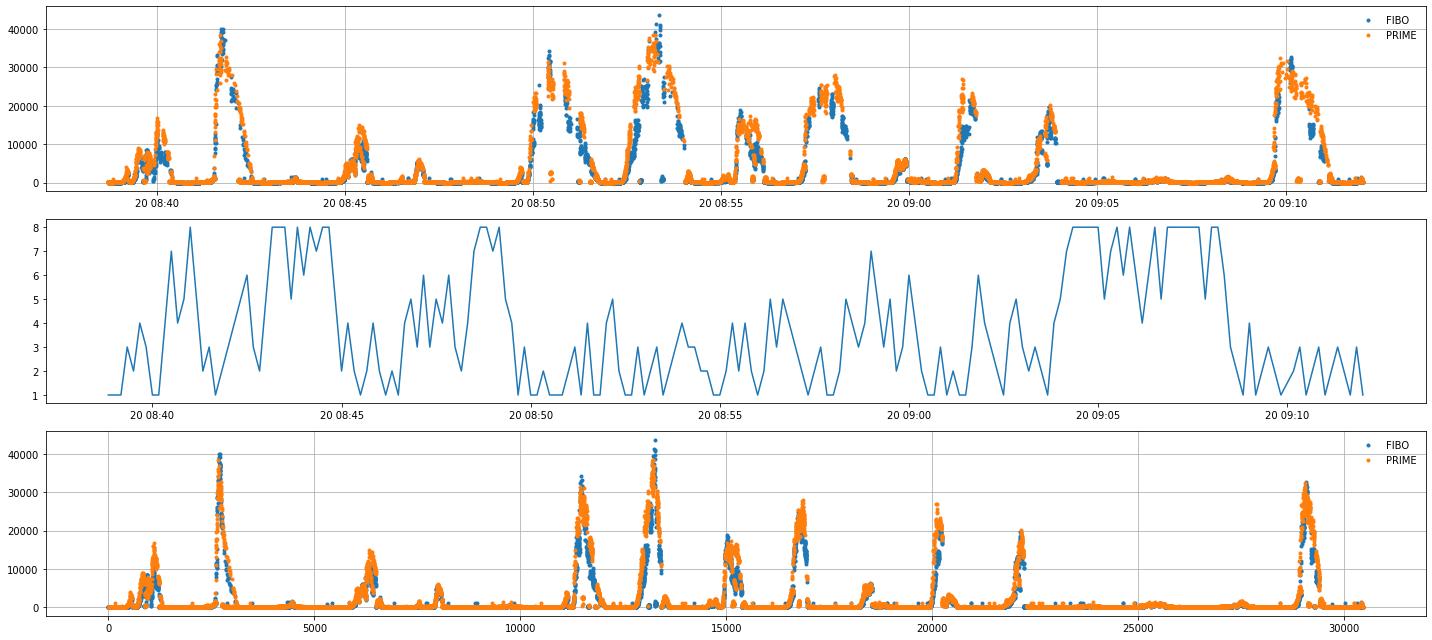

In [73]:
plot(dot = True)

Na tehát

Mire voltam kíváncsi?

Hogy az egyik REST API magával rántja-e a másikat?

---

Nagyítás

In [74]:
start_date = '2023-05-20 9:00'
end_date = '2023-05-20 10:30'

mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
F = FIBO.loc[mask]

F.shape

(6014, 28)

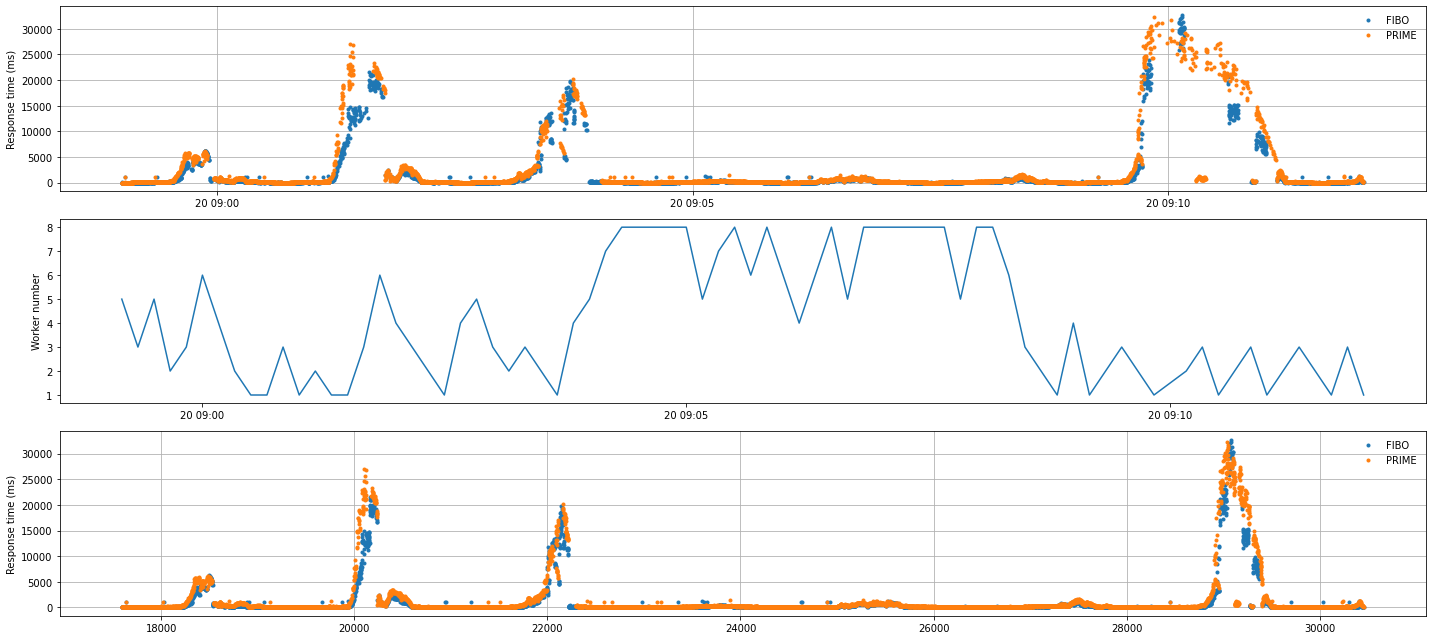

In [75]:
def zoom(start_date, end_date):

    mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
    F = FIBO.loc[mask]

    mask = (PRIME['date'] > start_date) & (PRIME['date'] <= end_date)
    P = PRIME.loc[mask]
    
    mask = (df['nntime'] > start_date) & (df['nntime'] <= end_date)
    D = df.loc[mask]
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(F['date'], F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax0.plot(P['date'], P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax0.set_ylabel('Response time (ms)')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(D['nntime'], D['worker_number'])
    ax1.set_ylabel('Worker number')
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax2.plot(P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax2.set_ylabel('Response time (ms)')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()

zoom('2023-05-20 8:59', '2023-05-20 9:35')

    154 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01
    155 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01

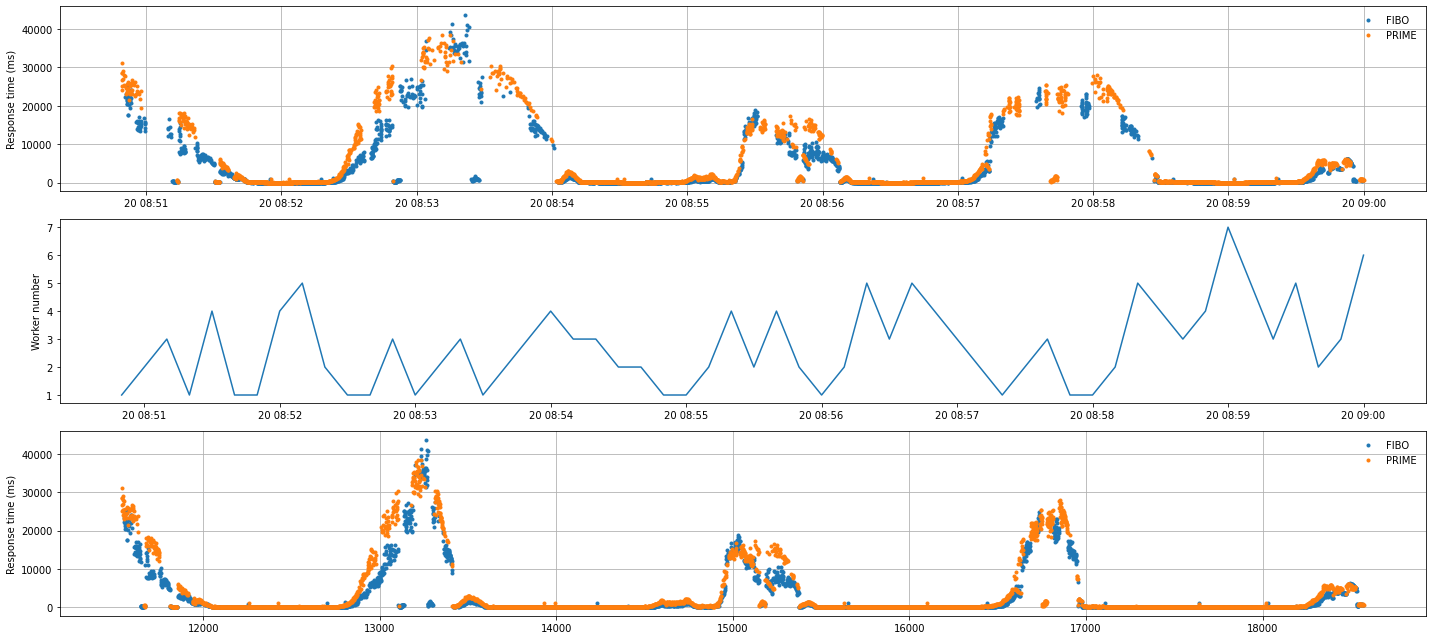

In [76]:
zoom('2023-05-20 8:50:39', '2023-05-20 9:00')

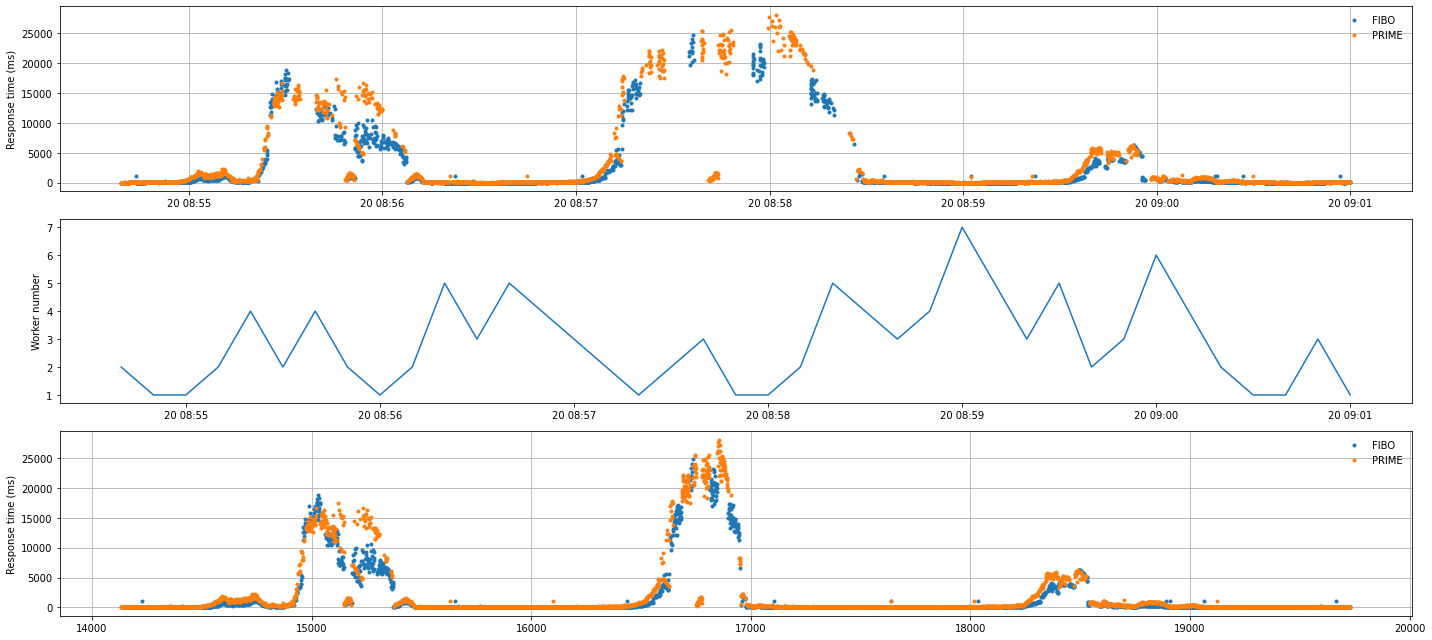

In [78]:
zoom('2023-05-20 8:54:39', '2023-05-20 9:01')

Hát azért így úgy tűnik, hogy magával húzza a másik REST API válaszidejét is.

## Helpers

In [ ]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)
